In [23]:
import numpy as np
import pandas as pd
from scipy import interpolate, integrate
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./Trial-Wireup 2.xlsx')

In [3]:
x = df['X'].to_numpy()
y = df['Y'].to_numpy()
t = df['Delay'].to_numpy()

In [4]:
r = np.stack([x, y]).T

In [5]:
#S = interpolate.CloughTocher2DInterpolator(r, t)
#S = interpolate.LinearNDInterpolator(r, t)
#S = interpolate.NearestNDInterpolator(r, t)
S = interpolate.Rbf(x, y, t, function='thin_plate')

In [6]:
N = 100
xl = np.linspace(x.min(), x.max(), N)
yl = np.linspace(y.min(), y.max(), N)
X, Y = np.meshgrid(xl, yl)

In [7]:
#tl = S(np.stack([X.ravel(), Y.ravel()]).T)
tl = S(X.ravel(), Y.ravel())

In [8]:
T = tl.reshape(X.shape)

In [9]:
DT = np.gradient(T, xl, yl, edge_order=1)

In [10]:
lt = np.linspace(0, 5000, 11)

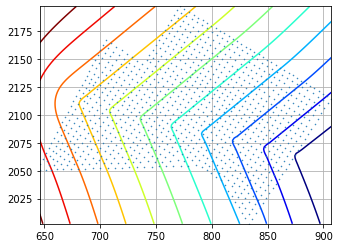

In [11]:
axe = plt.contour(X, Y, T, lt, cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

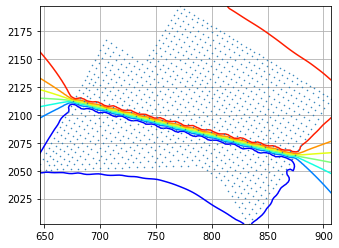

In [12]:
axe = plt.contour(X, Y, DT[0], cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

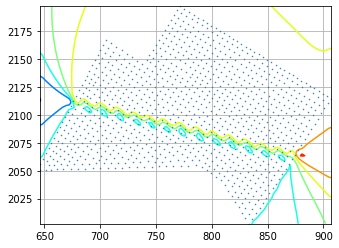

In [13]:
axe = plt.contour(X, Y, DT[1], cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

In [ ]:
stepx = np.diff(xl)[0]
stepy = np.diff(yl)[0]

In [25]:
# Calculate Gradient (velocity ms/m)
(dy, dx) = DT  # Find gradient for points on meshgrid


Velocity_dx = dx   # x velocity component ms/m
Velocity_dy = dy   # y velocity component ms/m

# Integrate to compare the original data input
dxintegral = np.nancumsum(Velocity_dx, axis=1) * stepx
dyintegral = np.nancumsum(Velocity_dy, axis=0) * stepy

n = N
valintegral = np.ma.zeros(dxintegral.shape)
for i in range(n):
    for j in range(n):
        valintegral[i, j] = np.ma.sum([dxintegral[0, n // 2],  dyintegral[i, n // 2], dxintegral[i, j], - dxintegral[i, n // 2]])
valintegral = valintegral * np.isfinite(dxintegral)

valintegral = valintegral + (min_value * -1)

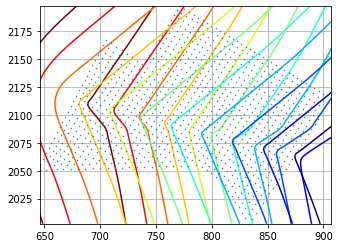

In [26]:
axe = plt.contour(X, Y, valintegral.data, lt, cmap='jet')
axe = plt.contour(X, Y, T, lt, cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

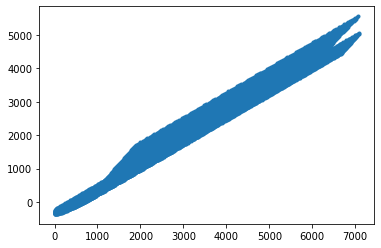

In [21]:
fig, axe = plt.subplots()
axe.plot(valintegral.data.ravel(), T.ravel(), '.')

In [18]:
T

array([[5058.69029757, 5003.62794706, 4948.83897866, ...,  -87.96921385,
        -134.70318377, -180.50159966],
       [5045.93202016, 4990.93224676, 4936.20600702, ...,  -99.83675009,
        -146.2324948 , -191.67163135],
       [5033.12578504, 4978.18800571, 4923.52391971, ..., -111.68108623,
        -157.71292196, -202.7671078 ],
       ...,
       [5497.14608908, 5446.44246845, 5396.7242954 , ..., 1724.89018966,
        1685.19348789, 1645.56330799],
       [5531.99353556, 5481.35875692, 5431.68981229, ..., 1755.11938445,
        1715.42620917, 1675.80087395],
       [5566.9332024 , 5516.35781741, 5466.72941476, ..., 1785.34635405,
        1745.65856136, 1706.03989205]])

In [22]:
integrate()

NameError: name 'integrate' is not defined